In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from startup import np, pd, plt, sns
from startup_gui import widgets, interact, interactive

In [3]:
import pzflow
# import tensorflow_probability.substrates.jax as tfp
import tensorflow as tf
import tensorflow_probability as tfp
import jax
import jax.numpy as jnp
import sympy as sp
from pzflow.examples import get_twomoons_data

In [4]:
import os

In [5]:
from journal_20231211_nf_functions import MafData, MafDataOriginal

In [6]:
tfd = tfp.distributions
tfb = tfp.bijectors

In [7]:
sp.init_printing(use_unicode=True)

# TensorFlow Probability 

In [8]:
batch_size = 512
# key, subkey = jax.random.split(jax.random.PRNGKey(42))
x2_dist = tfd.Normal(loc=0., scale=4.)
x2_samples = x2_dist.sample(batch_size) #, seed=subkey)
x1_dist = tfd.Normal(loc=0.25 * tf.square(x2_samples), scale=tf.ones(batch_size, dtype=tf.float32))
# key, subkey = jax.random.split(key)
x1_samples = x1_dist.sample()  #(seed=key)
x_sample = tf.stack([x1_samples, x2_samples], axis=1)

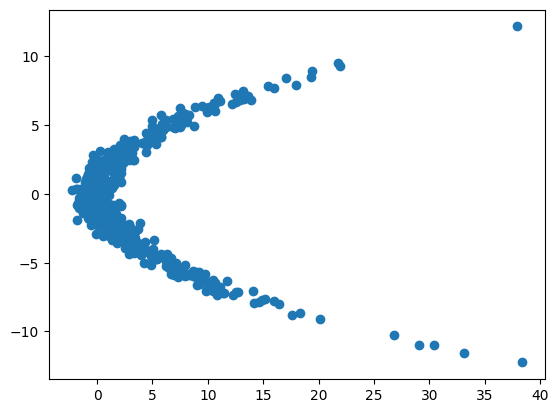

In [9]:
plt.scatter(x_sample[:, 0], x_sample[:, 1])

In [10]:
# dist = tfd.JointDistributionSequential(
#     [
#         tfd.Normal(loc=0., scale=4., name='x2'),
#         lambda x2: tfd.Normal(loc=0.25 * jnp.square(x2), scale=1., name='x1')
#     ],
#     use_vectorized_map=True, batch_ndims=0
# )
# print(f'Batch shape: {dist.batch_shape}, Event shape: {dist.event_shape}')
# x2, x1 = dist.sample(batch_size, seed=key)

In [11]:
# plt.scatter(x1, x2)
# dist.resolve_graph()
# x2.shape
# indep_dist = tfd.Independent(distribution=dist, reinterpreted_batch_ndims=1)
# print(f'Batch shape: {indep_dist.batch_shape}, Event shape: {indep_dist.event_shape}')

In [12]:
fname = 'power_flow_hour_month_20231213.pzflow.pkl'
flow = pzflow.Flow(file=fname)

In [13]:
flow._bijector_info

('Chain',
 (('ShiftBounds',
   (Array([ 8.3999999e-02,  0.0000000e+00,  2.2448000e+02,  4.0000001e-01,
            0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -1.9666667e+00],      dtype=float32),
    Array([  9.59    ,   0.946   , 251.65    ,  41.2     ,  78.      ,
            76.      ,  20.      , 122.166664], dtype=float32),
    4.0)),
  ('Chain',
   (('NeuralSplineCoupling', (16, 5, 2, 128, None, 2, False)),
    ('Roll', (1,)),
    ('NeuralSplineCoupling', (16, 5, 2, 128, None, 2, False)),
    ('Roll', (1,)),
    ('NeuralSplineCoupling', (16, 5, 2, 128, None, 2, False)),
    ('Roll', (1,)),
    ('NeuralSplineCoupling', (16, 5, 2, 128, None, 2, False)),
    ('Roll', (1,)),
    ('NeuralSplineCoupling', (16, 5, 2, 128, None, 2, False)),
    ('Roll', (1,)),
    ('NeuralSplineCoupling', (16, 5, 2, 128, None, 2, False)),
    ('Roll', (1,)),
    ('NeuralSplineCoupling', (16, 5, 2, 128, None, 2, False)),
    ('Roll', (1,)),
    ('NeuralSplineCoupling', (16, 5, 2, 128, None, 2, False))

In [14]:
?pzflow.bijectors.ShiftBounds

Signature:       pzflow.bijectors.ShiftBounds(min: float, max: float, B: float = 5) -> Tuple[pzflow.bijectors.InitFunction, Tuple[str, tuple]]
Call signature:  pzflow.bijectors.ShiftBounds(*args, **kwargs) -> Tuple[pzflow.bijectors.InitFunction, Tuple[str, tuple]]
Type:            Bijector
String form:     <pzflow.bijectors.Bijector object at 0x15c8a5900>
File:            ~/Work/Projects/PyBayes/venv_jax/lib/python3.10/site-packages/pzflow/bijectors.py
Docstring:      
Bijector shifts the bounds of inputs so the lie in the range (-B, B).

Parameters
----------
min : float
    The minimum of the input range.
min : float
    The maximum of the input range.
B : float; default=5
    The extent of the output bounds, which will be (-B, B).

Returns
-------
InitFunction
    The InitFunction of the ShiftBounds Bijector.
Bijector_Info
    Tuple of the Bijector name and the input parameters.
    This allows it to be recreated later.
Class docstring: Wrapper class for bijector functions

In [15]:
?pzflow.bijectors.NeuralSplineCoupling

Signature:      
pzflow.bijectors.NeuralSplineCoupling(
    K: int = 16,
    B: float = 5,
    hidden_layers: int = 2,
    hidden_dim: int = 128,
    transformed_dim: int = None,
    n_conditions: int = 0,
    periodic: bool = False,
) -> Tuple[pzflow.bijectors.InitFunction, Tuple[str, tuple]]
Call signature:  pzflow.bijectors.NeuralSplineCoupling(*args, **kwargs) -> Tuple[pzflow.bijectors.InitFunction, Tuple[str, tuple]]
Type:            Bijector
String form:     <pzflow.bijectors.Bijector object at 0x15c8a5810>
File:            ~/Work/Projects/PyBayes/venv_jax/lib/python3.10/site-packages/pzflow/bijectors.py
Docstring:      
A coupling layer bijection with rational quadratic splines.

This Bijector is a Coupling Layer [1,2], and as such only transforms
the second half of input dimensions (or the last N dimensions, where
N = transformed_dim). In order to transform all of the dimensions,
you need multiple Couplings interspersed with Bijectors that change
the order of inputs dimensions,

In [16]:
df_m = get_twomoons_data()

In [17]:
# flow_m = pzflow.Flow(["x", "y"])

# losses = flow_m.train(df_m, verbose=True)

# flow_m._bijector_info[1][1][1]

# # flow_m._params

In [18]:
?pzflow.bijectors.Chain

Signature:      
pzflow.bijectors.Chain(
    *inputs: Sequence[Tuple[pzflow.bijectors.InitFunction, Tuple[str, tuple]]],
) -> Tuple[pzflow.bijectors.InitFunction, Tuple[str, tuple]]
Call signature:  pzflow.bijectors.Chain(*args, **kwargs) -> Tuple[pzflow.bijectors.InitFunction, Tuple[str, tuple]]
Type:            Bijector
String form:     <pzflow.bijectors.Bijector object at 0x15c8a56f0>
File:            ~/Work/Projects/PyBayes/venv_jax/lib/python3.10/site-packages/pzflow/bijectors.py
Docstring:      
Bijector that chains multiple InitFunctions into a single InitFunction.

Parameters
----------
inputs : (Bijector1(), Bijector2(), ...)
    A container of Bijector calls to be chained together.

Returns
-------
InitFunction
    The InitFunction of the total chained Bijector.
Bijector_Info
    Tuple('Chain', Tuple(Bijector_Info for each bijection in the chain))
    This allows the chain to be recreated later.
Class docstring: Wrapper class for bijector functions

In [19]:
?tfb.Chain

Init signature: tfb.Chain(*args, **kwargs)
Docstring:     
Bijector which applies a composition of bijectors.

  Example Use:

  ```python
  chain = Chain([Exp(), Softplus()], name="one_plus_exp")
  ```

  Results in:

  * Forward:

    ```python
    exp = Exp()
    softplus = Softplus()
    Chain([exp, softplus]).forward(x)
    = exp.forward(softplus.forward(x))
    = tf.exp(tf.log(1. + tf.exp(x)))
    = 1. + tf.exp(x)
    ```

  * Inverse:

    ```python
    exp = Exp()
    softplus = Softplus()
    Chain([exp, softplus]).inverse(y)
    = softplus.inverse(exp.inverse(y))
    = tf.log(tf.exp(tf.log(y)) - 1.)
    = tf.log(y - 1.)
    ```

  Keyword arguments can be passed to the inner bijectors by utilizing the inner
  bijector names, e.g.:

  ```python
  chain = Chain([Bijector1(name='b1'), Bijector2(name='b2')])
  y = chain.forward(x, b1={'arg': 1}, b2={'arg': 2})

  # Equivalent to:
  z = Bijector2().forward(x, arg=1)
  y = Bijector1().forward(z, arg=2)
  ```

  
If every element of

In [20]:
?tfb.RationalQuadraticSpline

Init signature:
tfb.RationalQuadraticSpline(
    bin_widths,
    bin_heights,
    knot_slopes,
    range_min=-1,
    validate_args=False,
    name=None,
)
Docstring:     
A piecewise rational quadratic spline, as developed in [1].

This transformation represents a monotonically increasing piecewise rational
quadratic function. Outside of the bounds of `knot_x`/`knot_y`, the transform
behaves as an identity function.

Typically this bijector will be used as part of a chain, with splines for
trailing `x` dimensions conditioned on some of the earlier `x` dimensions, and
with the inverse then solved first for unconditioned dimensions, then using
conditioning derived from those inverses, and so forth. For example, if we
split a 15-D `xs` vector into 3 components, we may implement a forward and
inverse as follows:

```python
nsplits = 3

class SplineParams(tf.Module):

  def __init__(self, nbins=32, interval_width=2, range_min=-1,
               min_bin_width=1e-3, min_slope=1e-3):
    self.

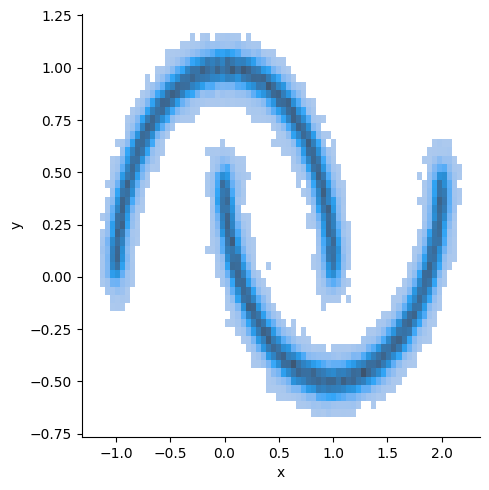

In [21]:
sns.displot(df_m, x='x', y='y')

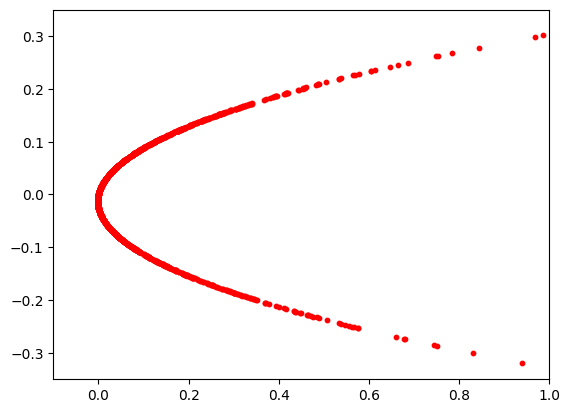

In [22]:
def sample(num):
    return np.array(np.random.uniform(-1,1,(num,2)), dtype='float32') #A real hard problem

# Adapted from: https://blog.evjang.com/2018/01/nf1.html
def sample_2(batch_size=500):
    x2_dist = tfd.Normal(loc=0., scale=4.)
    x2_samples = x2_dist.sample(batch_size)
    x1 = tfd.Normal(loc=.25 * tf.square(x2_samples),
                    scale=tf.ones(batch_size, dtype=tf.float32))
    x1_samples = x1.sample()
    x_samples = tf.stack([x1_samples, x2_samples], axis=1)
    return x_samples.numpy()/40.0


X = sample_2(1500)
xlim, ylim = [-2, 2], [-2, 2]
plt.scatter(X[:, 0], X[:, 1], s=10, color='red')
plt.xlim(-0.1,1)
plt.ylim(-0.35,0.35)
plt.show()

In [26]:
# See also https://github.com/tensorflow/probability/blob/master/tensorflow_probability/python/bijectors/real_nvp.py
from pylab import *
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
tfb = tfp.bijectors
tfd = tfp.distributions
#123456789012345678901234567890123456789012345678901234
class RealNVP(tf.keras.models.Model):

    def __init__(self, *, output_dim, num_masked, **kwargs): #** additional arguments for the super class
        super().__init__(**kwargs)
        self.output_dim = output_dim
        self.nets=[]
        #123456789012345678901234567890123456789012345678901234
        # We need to keep track of the nets
        bijectors=[] #A
        num_blocks = 5 #B
        h = 32  # C
        for i in range(num_blocks): 
            net = tfb.real_nvp_default_template([h, h])#D
            bijectors.append(
                tfb.RealNVP(shift_and_log_scale_fn=net, 
                            num_masked=num_masked))#E
            bijectors.append(tfb.Permute([1,0])) #F
            self.nets.append(net) 
        bijector = tfb.Chain(list(reversed(bijectors[:-1])))

        self.flow = tfd.TransformedDistribution(#G
            distribution=tfd.MultivariateNormalDiag(loc=[0., 0.]), 
            bijector=bijector)
        
#A List of bijectors, to this list we add num_blocks of coupling permutations blocks   
#B Number of hidden layers in the NF model
#C size of the hidden layers 
#D Definition of the Network
#E A shift and flow with parameters from the network
#F Permutation of coordinates
#G Distribution using z with two independent Gaussians



    def call(self, *inputs): 
        return self.flow.bijector.forward(*inputs)
    

model = RealNVP(output_dim=2, num_masked=1)
### Below is a bit magic stuff, concerning eager execution
#model.summary() #Yields an error. The model needs called before it is build.
_ = model(X) 
print(model.summary())

Model: "real_nvp_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 5930 (23.16 KB)
Trainable params: 5930 (23.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [27]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
##### Important
#Needs to be called other-wise @tf.function has problem
-tf.reduce_mean(model.flow.log_prob(X)) 

@tf.function #Adding the tf.function makes it about 10-50 times faster!!!
def train_step(X): 
    with tf.GradientTape() as tape:
        loss = -tf.reduce_mean(model.flow.log_prob(X)) 
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss      

from time import time
start = time()
for i in range(1001):
    #Xs = sample(1000) #Creat new training data
    loss = train_step(X)
    if (i % 100 == 0):
        print(i, " ",loss.numpy(), (time()-start))
        start = time()

0   1.865707 2.3011810779571533
100   -0.017065074 1.8353440761566162
200   -0.042698037 1.6830768585205078
300   -0.65318626 1.6984591484069824
400   -1.3827897 1.7054638862609863
500   0.5311656 1.697566032409668
600   -0.9074377 1.7047569751739502
700   -1.4921293 1.7019731998443604
800   -1.3048108 1.6857187747955322
900   14.339932 1.6466810703277588
1000   10.252742 1.6612768173217773


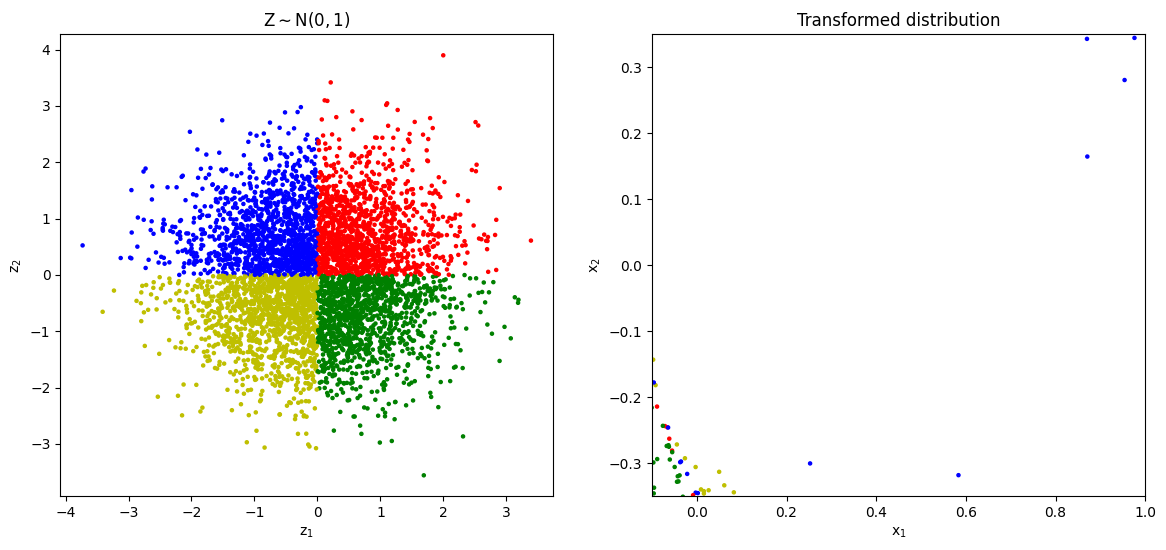

In [28]:
#XF = model.flow.sample(5000)
Z = np.random.normal(0,1,(5000,2))
cols = []
for i in range(5000):
    if (Z[i,0] > 0 and Z[i,1] > 0):
        cols.append('r')
    elif (Z[i,0] < 0 and Z[i,1] > 0):
        cols.append('b')
    elif (Z[i,0] < 0 and Z[i,1] < 0):
        cols.append('y')
    else:
        cols.append('g')

plt.figure(figsize=(14,6))
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.subplot(1,2,1)
plt.scatter(Z[:, 0], Z[:, 1], s=5,c=cols)
plt.title('$Z \sim N(0,1)$')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
Xs = model(Z)

plt.subplot(1,2,2)
plt.title('Transformed distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5, c=cols)
plt.xlim(-0.1,1)
plt.ylim(-0.35,0.35)